In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("datasets/libras_minds_dataset_openpose.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,hello,hello_0.avi,0,0.656550,0.932395,0.025427,0.654852,0.936922,0.018061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,hello,hello_0.avi,1,0.654789,0.870996,0.124683,0.676395,0.889949,0.042268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,hello,hello_0.avi,2,0.701695,0.784901,0.017858,0.668885,0.802914,0.018611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,hello,hello_0.avi,3,0.703596,0.738675,0.033277,0.704249,0.617640,0.028435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,hello,hello_0.avi,4,0.722398,0.629388,0.055209,0.721750,0.602609,0.019473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2245,you,you_9.avi,25,0.687613,0.987464,0.052100,0.686957,1.024196,0.028007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
22496,2246,you,you_9.avi,26,0.690882,0.988480,0.037995,0.687608,1.024281,0.023716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
22497,2247,you,you_9.avi,27,0.694779,0.985757,0.023028,0.686354,1.022913,0.024061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
22498,2248,you,you_9.avi,28,0.688939,0.989507,0.041573,0.685065,1.023943,0.025412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [61]:
df_video = df[df["video_name"] == "001_001_001.mp4"]
video_frames = df_video["frame"].max()
print(video_frames)
frames_diff = video_frames - target_frames
print(frames_diff)
frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
# frames_to_remove = [video_frames]
frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
# if len(frames_to_remove) < frames_diff:
#     frames_to_remove += [i for i in range(0, len(frames_to_remove) - frames_diff)]
print(frames_to_remove)
new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
new_df

87
-33
[]


,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,1,001_001_001.mp4,83,0.558347,0.945418,0.398738,0.541337,0.978682,0.123547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
84,84,1,001_001_001.mp4,84,0.558335,0.944465,0.403318,0.541895,0.983771,0.116143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
85,85,1,001_001_001.mp4,85,0.558347,0.944437,0.400255,0.541910,0.983735,0.116103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
86,86,1,001_001_001.mp4,86,0.558266,0.944817,0.405364,0.541950,0.986827,0.097616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


<Axes: >

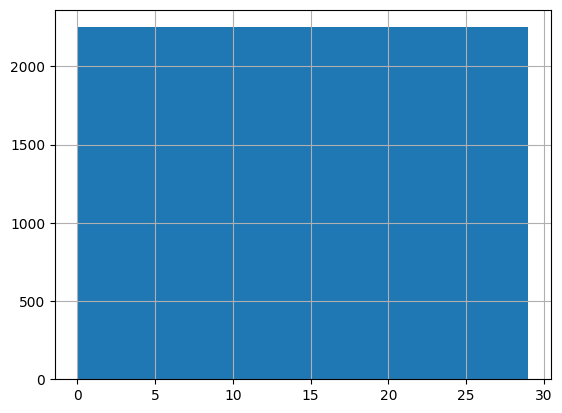

In [5]:
df["frame"].hist()

In [6]:
df["category"].unique()

array(['hello', 'howAre', 'love', 'mask', 'no', 'please', 'sorry',
       'thanks', 'wear', 'you'], dtype=object)

<Axes: >

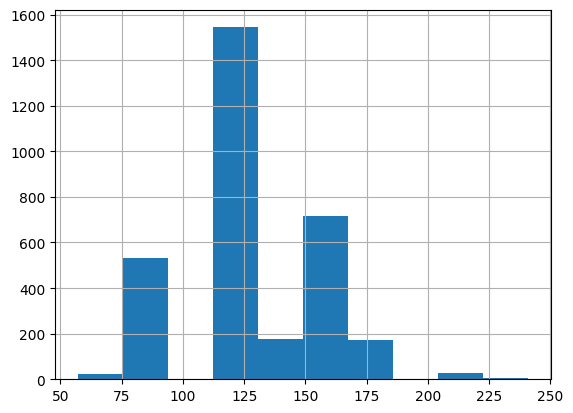

In [7]:
df.groupby("video_name")["frame"].max().hist()

In [8]:
df.groupby("video_name")["frame"].max()

video_name
001_001_001.mp4     87
001_001_002.mp4    147
001_001_003.mp4    117
001_001_004.mp4    117
001_001_005.mp4     87
                  ... 
064_010_001.mp4    121
064_010_002.mp4    121
064_010_003.mp4    121
064_010_004.mp4     91
064_010_005.mp4    151
Name: frame, Length: 3200, dtype: int64

In [9]:
df.groupby("video_name")["frame"].max().min()

57

In [31]:
target_frames = 120

In [62]:
df_new_fps = pd.DataFrame(columns=df.columns)
for video_name in df["video_name"].unique():
    df_video = df[df["video_name"] == video_name]
    video_frames = df_video["frame"].max()
    if video_frames < target_frames:
        new_df = df_video
        last_frame = df_video[df_video["frame"] == video_frames]
        frames_count = target_frames - video_frames - 1
        new_df = pd.concat([last_frame] * frames_count)
        new_df["frame"] = np.arange(video_frames + 1, target_frames)
        new_df = pd.concat([df_video, new_df])
    else:
        frames_diff = video_frames - target_frames
        frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
        frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
        new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
    df_new_fps = pd.concat([df_new_fps, new_df])

In [63]:
df_new_fps

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408897,6227,9,009_010_005.mp4,115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408898,6228,9,009_010_005.mp4,116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408899,6229,9,009_010_005.mp4,117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
408899,6229,9,009_010_005.mp4,118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [64]:
df_new_fps["category"].unique()

array([1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 7, 8, 9], dtype=object)

In [66]:
len(df_new_fps["category"].unique())

64

In [98]:
grouped_count = df_new_fps.groupby("video_name")["frame"].count()

In [99]:
grouped_count[grouped_count > target_frames]

Series([], Name: frame, dtype: int64)

In [97]:
video_names = list(grouped_count[grouped_count > target_frames].index)
for video_name in video_names:
    df_video = df_new_fps[df_new_fps["video_name"] == video_name]
    extra_frames = len(df_video) - target_frames
    frames_to_remove = df_video.iloc[-extra_frames:]
    df_new_fps = df_new_fps.drop(frames_to_remove.index)

In [100]:
grouped_count[grouped_count < target_frames]

Series([], Name: frame, dtype: int64)

In [14]:
len(df_new_fps.video_name.unique()) * target_frames

384000

In [101]:
df_new_fps.groupby("video_name")["frame"].count()

video_name
001_001_001.mp4    120
001_001_002.mp4    120
001_001_003.mp4    120
001_001_004.mp4    120
001_001_005.mp4    120
                  ... 
064_010_001.mp4    120
064_010_002.mp4    120
064_010_003.mp4    120
064_010_004.mp4    120
064_010_005.mp4    120
Name: frame, Length: 3200, dtype: int64

In [102]:
df_new_fps.to_csv(f"datasets/lsa64_dataset_openpose_{target_frames}_frames.csv")